In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [5]:
type(X_train[10])

numpy.ndarray

In [6]:
print(type(X_train[10]).shape)

<attribute 'shape' of 'numpy.ndarray' objects>


<function matplotlib.pyplot.show(close=None, block=None)>

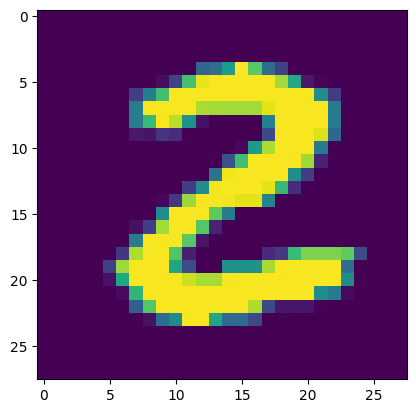

In [7]:
plt.imshow(X_train[25])
plt.show

In [8]:
print(y_train[25])

2


In [9]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [10]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

In [14]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2990 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1448 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1053 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0850 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0691 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0601 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0505 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0390 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0

In [16]:
loss,accuracy = model.evaluate(X_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1069 - accuracy: 0.9705
0.9704999923706055


In [17]:
print(X_test.shape)

(10000, 28, 28)


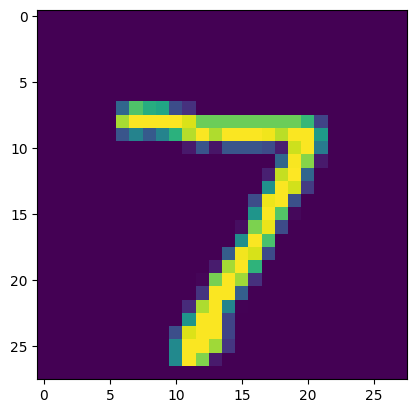

In [18]:
plt.imshow(X_test[0])
plt.show()

In [19]:
print(y_test[0])

7


In [20]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
print(y_pred[0])

[1.9996755e-02 1.0847977e-03 5.9540528e-01 8.4714544e-01 1.8263991e-06
 3.5720719e-03 2.9491287e-09 9.9999797e-01 5.1934086e-02 8.3186591e-01]


In [22]:
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(y_pred)

In [25]:
#CONFUSION MATRIX
confusion_mat = confusion_matrix(y_test,y_pred_labels)

In [ ]:
confusion_mat

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.ylabel('Predicted Labels')

In [102]:
input_image_path = '/content/drive/MyDrive/subham/ML PROJECT/Digits_Lib/digit-5.png'

In [85]:
input_image = cv2.imread(input_image_path)

In [86]:
type(input_image)

numpy.ndarray

In [87]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


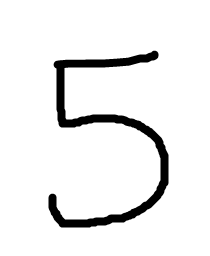

In [88]:
cv2_imshow(input_image)

In [89]:
input_image.shape

(256, 210, 3)

In [90]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [91]:
grayscale.shape

(256, 210)

In [92]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [93]:
input_image_resize

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 214, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [94]:
cv2_imshow(input_image_resize)

In [95]:
input_image_resize = input_image_resize/255


In [96]:
type(input_image_resize)

numpy.ndarray

In [97]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [98]:
input_prediction = model.predict(image_reshaped )
print(input_prediction) 

1/1 [==============================] - 0s 24ms/step
[[1.1085627e-06 3.7854275e-01 9.9999261e-01 2.1750859e-07 3.3147883e-32
  1.0000000e+00 2.8638550e-10 1.0000000e+00 1.1135078e-19 1.2227224e-16]]


In [99]:
input_pred_label = np.argmax(input_prediction)

In [100]:
print(input_pred_label)

5


Path of the image to be predicted: /content/drive/MyDrive/subham/ML PROJECT/Digits_Lib/digit-5.png


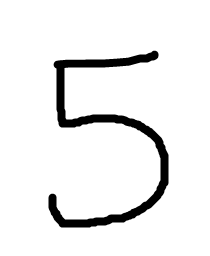

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognised as  5


In [101]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)